In [3]:
import PowerSystemClasses as ps
import opendssdirect as dss

def main():
    Dnetwork = ps.DistNetwork()

    components = {'nodes': 'nodes.csv',
              'line_geos': 'LineGeometry.csv',
              'wire_data': 'WireData.csv',
              'CN_data': 'CNData.csv',
              'lines': 'lines.csv',
              'loads': 'loads.csv',
              'xfmrs': 'xfmrs.csv',
              'circuit': 'circuit.csv'}
    
    Dnetwork.add_network_components(components)

    Dnetwork.compile_DSS()
    sub_meter = ps.Meter(circ_element='Transformer', bus1='src_node', bus2='n0')
    sub_meter.to_DSS()

    Dnetwork.solve_DSS()
    Dnetwork.record_DSS_bus_voltages()
    return Dnetwork
    

DN = main()

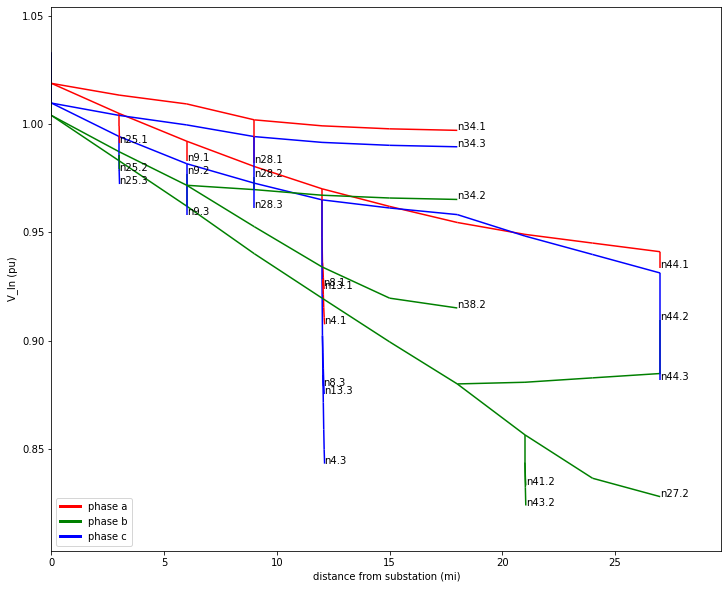

In [4]:
DN.plot_bus_voltages()

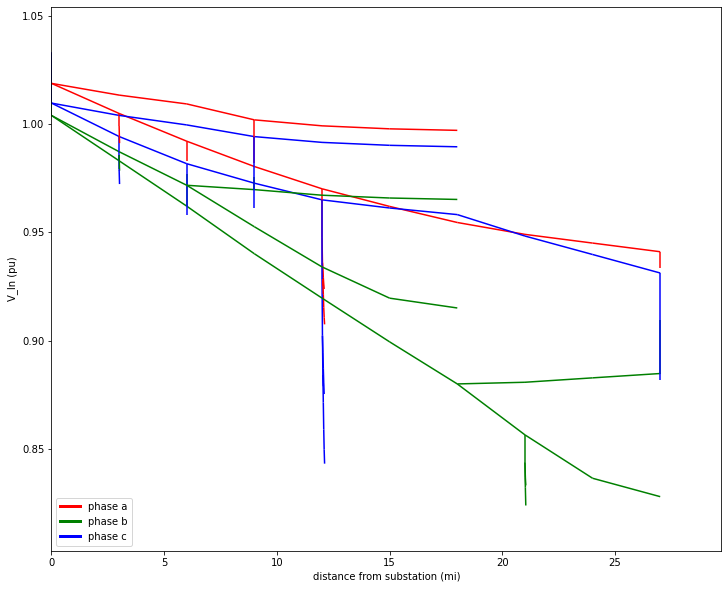

In [3]:
DN.plot_bus_voltages(sink_lbls=False)

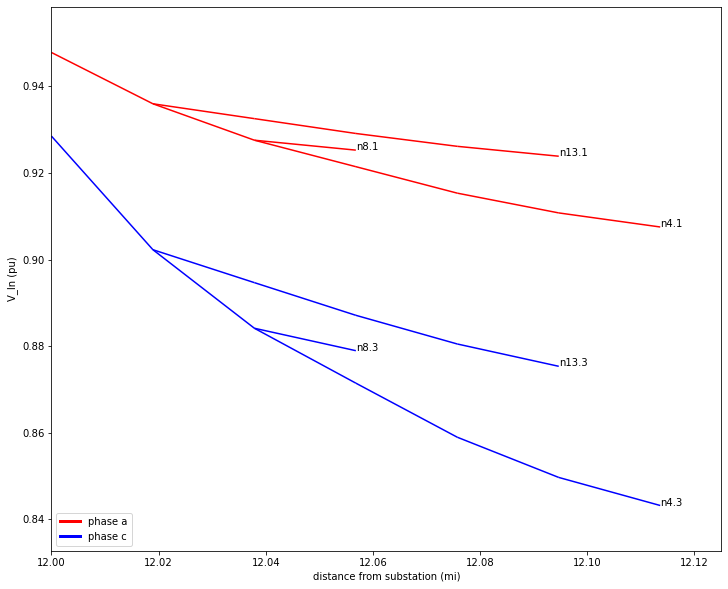

In [4]:
DN.plot_bus_voltages('n5')

In [11]:
import pandas as pd
import numpy as np

bus = 'n24'
dss.Circuit.SetActiveBus(bus)
voltage = np.array(dss.Bus.VMagAngle())
voltage = voltage.reshape(int(voltage.size/2),2)
vpu = np.array(dss.Bus.PuVoltage())
print(vpu)
terms = DN.nodes[bus]['hot_terminals']
vbase = DN.nodes[bus]['Vln_base']
print(vbase)
bus_voltage = pd.DataFrame({
                            'Vmag': voltage[:,0], 
                            'Vang': voltage[:, 1], 
                            'Vpu': (1/(vbase))*voltage[:,0]
                            }, index=terms)
bus_voltage

[ 0.45169271 -0.77188914 -0.88361206  0.00094656  0.4505974   0.77092248]
240.17771198288435


,Vmag,Vang,Vpu
1,247.846015,-59.664759,1.031928
2,244.873898,179.938623,1.019553
3,247.461528,59.694090,1.030327


In [5]:
dss.utils.loads_to_dataframe()

,CVRCurve,CVRvars,CVRwatts,CFactor,Class,Growth,IsDelta,Model,Name,NumCust,...,kV,kW,kVABase,kvar,kWh,kWhDays,puSeriesRL,XfkVA,Phases,AllocationFactor
load_n2,,2.0,1.0,4.0,1,,True,1,load_n2,1,...,0.24,7.0,7.28011,2.0,0.0,30.0,50.0,0.0,2,0.5
load_n3,,2.0,1.0,4.0,1,,True,1,load_n3,1,...,0.24,6.0,6.324555,2.0,0.0,30.0,50.0,0.0,2,0.5
load_n4,,2.0,1.0,4.0,1,,True,1,load_n4,1,...,0.24,15.0,15.66046,4.5,0.0,30.0,50.0,0.0,2,0.5
load_n8,,2.0,1.0,4.0,1,,True,1,load_n8,1,...,0.24,10.0,10.77033,4.0,0.0,30.0,50.0,0.0,2,0.5
load_n9,,2.0,1.0,4.0,1,,True,1,load_n9,1,...,0.416,50.0,53.851648,20.0,0.0,30.0,50.0,0.0,3,0.5
load_n11,,2.0,1.0,4.0,1,,True,1,load_n11,1,...,0.24,2.0,2.061553,0.5,0.0,30.0,50.0,0.0,2,0.5
load_n12,,2.0,1.0,4.0,1,,True,1,load_n12,1,...,0.24,3.0,3.162278,1.0,0.0,30.0,50.0,0.0,2,0.5
load_n13,,2.0,1.0,4.0,1,,True,1,load_n13,1,...,0.24,10.0,10.77033,4.0,0.0,30.0,50.0,0.0,2,0.5
load_n16,,2.0,1.0,4.0,1,,False,1,load_n16,1,...,12.47,70.0,70.710678,10.0,0.0,30.0,50.0,0.0,3,0.5
load_n18,,2.0,1.0,4.0,1,,False,1,load_n18,1,...,12.47,30.0,32.695565,13.0,0.0,30.0,50.0,0.0,3,0.5


In [6]:
def main_calc_load_voltages():
    Dnetwork_calc = ps.DistNetwork()

    components = {'nodes': 'nodes.csv',
              'line_geos': 'LineGeometry.csv',
              'wire_data': 'WireData.csv',
              'CN_data': 'CNData.csv',
              'lines': 'lines.csv',
              'loads': 'loads.csv',
              'xfmrs': 'xfmrs.csv',
              'circuit': 'circuit.csv'}
    
    Dnetwork_calc.add_network_components(components, calc_kV=True)

    Dnetwork_calc.compile_DSS()
    sub_meter = ps.Meter(circ_element='Transformer', bus1='src_node', bus2='n0')
    sub_meter.to_DSS()

    Dnetwork_calc.solve_DSS()
    Dnetwork_calc.record_DSS_bus_voltages()
    return Dnetwork_calc
    

DN_calc = main_calc_load_voltages()

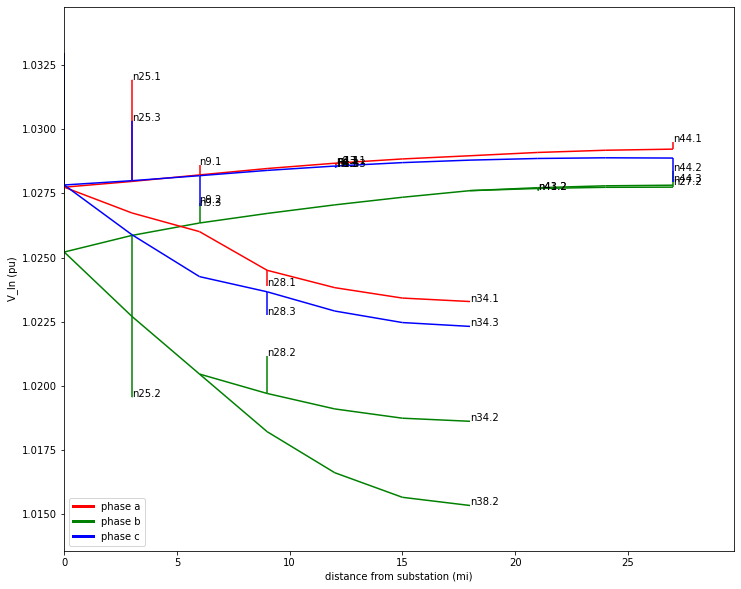

In [8]:
DN_calc.plot_bus_voltages()

In [7]:
dss.utils.loads_to_dataframe()

,CVRCurve,CVRvars,CVRwatts,CFactor,Class,Growth,IsDelta,Model,Name,NumCust,...,kV,kW,kVABase,kvar,kWh,kWhDays,puSeriesRL,XfkVA,Phases,AllocationFactor
load_n2,,2.0,1.0,4.0,1,,True,1,load_n2,1,...,240.177712,7.0,7.28011,2.0,0.0,30.0,50.0,0.0,2,0.5
load_n3,,2.0,1.0,4.0,1,,True,1,load_n3,1,...,240.177712,6.0,6.324555,2.0,0.0,30.0,50.0,0.0,2,0.5
load_n4,,2.0,1.0,4.0,1,,True,1,load_n4,1,...,240.177712,15.0,15.66046,4.5,0.0,30.0,50.0,0.0,2,0.5
load_n8,,2.0,1.0,4.0,1,,True,1,load_n8,1,...,240.177712,10.0,10.77033,4.0,0.0,30.0,50.0,0.0,2,0.5
load_n9,,2.0,1.0,4.0,1,,True,1,load_n9,1,...,416.0,50.0,53.851648,20.0,0.0,30.0,50.0,0.0,3,0.5
load_n11,,2.0,1.0,4.0,1,,True,1,load_n11,1,...,240.177712,2.0,2.061553,0.5,0.0,30.0,50.0,0.0,2,0.5
load_n12,,2.0,1.0,4.0,1,,True,1,load_n12,1,...,240.177712,3.0,3.162278,1.0,0.0,30.0,50.0,0.0,2,0.5
load_n13,,2.0,1.0,4.0,1,,True,1,load_n13,1,...,240.177712,10.0,10.77033,4.0,0.0,30.0,50.0,0.0,2,0.5
load_n16,,2.0,1.0,4.0,1,,False,1,load_n16,1,...,12470.0,70.0,70.710678,10.0,0.0,30.0,50.0,0.0,3,0.5
load_n18,,2.0,1.0,4.0,1,,False,1,load_n18,1,...,12470.0,30.0,32.695565,13.0,0.0,30.0,50.0,0.0,3,0.5
